In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Studies/SEM 6/BIA/Presentation/sales.csv")

In [4]:
X = df["Product_Name"]
y = df["Product_Category"]

In [5]:
print(df.columns)

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')


In [6]:
print(df.head())

   Order_ID Order_Priority  Order_Quantity    Sales    Ship_Mode  Profit  \
0       643           High              21  2781.82  Express Air -695.26   
1      8995           High              35  3389.93  Express Air  737.94   
2      9127  Not Specified               7  2039.56  Express Air -329.49   
3     26272            Low               6   905.94  Express Air   -4.19   
4     36646         Medium              24  1168.15  Express Air -743.96   

        Customer_Name                 Region Customer_Segment  \
0      Monica Federle                Nunavut        Corporate   
1          Beth Paige  Northwest Territories         Consumer   
2         Bryan Davis  Northwest Territories        Corporate   
3         Carlos Daly  Northwest Territories      Home Office   
4  Muhammed MacIntyre  Northwest Territories   Small Business   

  Product_Category    Product_Sub-Category  \
0  Office Supplies  Storage & Organization   
1        Furniture      Office Furnishings   
2  Office Supp

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [9]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [10]:
y_pred = classifier.predict(X_test_vectorized)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy*100}")

Accuracy: 91.78082191780823


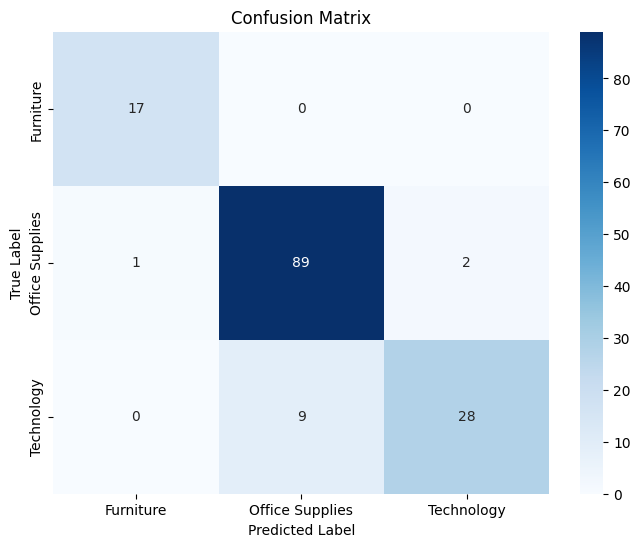

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=classifier.classes_,
    yticklabels=classifier.classes_,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [14]:
df_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_results["Count"] = 1
bar_chart_data = df_results.groupby(["Actual", "Predicted"]).count().reset_index()

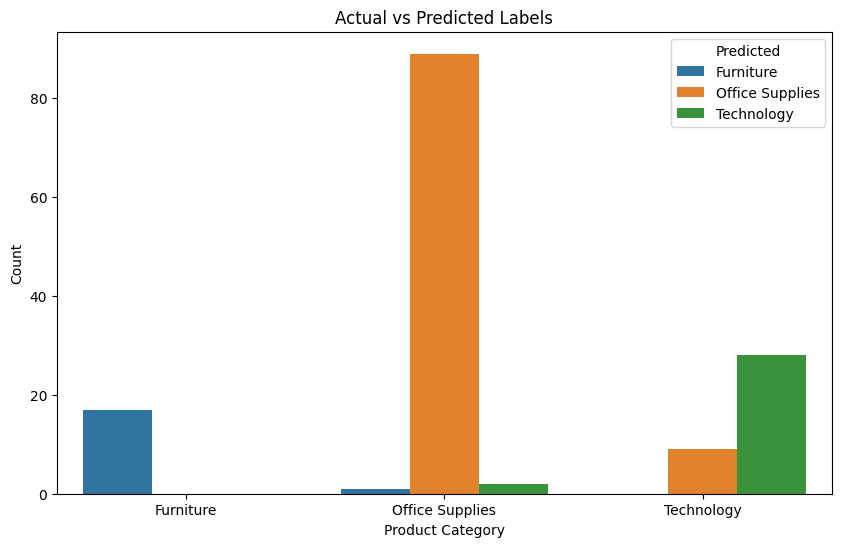

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Actual", y="Count", hue="Predicted", data=bar_chart_data)
plt.title("Actual vs Predicted Labels")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()